In [ ]:
pip install --upgrade scikit-learn xgboost


In [ ]:
pip install scikit-learn==1.0.2 xgboost==1.6.1


Found 5772 images belonging to 2 classes.
Found 1441 images belonging to 2 classes.
Found 901 images belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/legacy/preprocessing/image.py:146: UserWarning: Using ".tiff" files with multiple bands will cause distortion. Please verify your output.
  warnings.warn(


29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 15s 64ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/ste

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:15:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warni

Validation Set Results:
Accuracy: 0.94
Precision: 0.94
Sensitivity (Recall): 0.94
Specificity: 0.93
F1 Score: 0.94
AUC: 0.98
Confusion Matrix:
[[630  44]
 [ 47 720]]


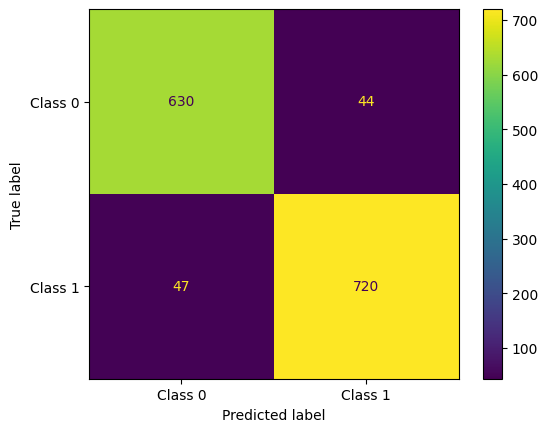

Test Set Results:
Accuracy: 0.92
Precision: 0.94
Sensitivity (Recall): 0.92
Specificity: 0.93
F1 Score: 0.93
AUC: 0.98
Confusion Matrix:
[[383  30]
 [ 39 449]]


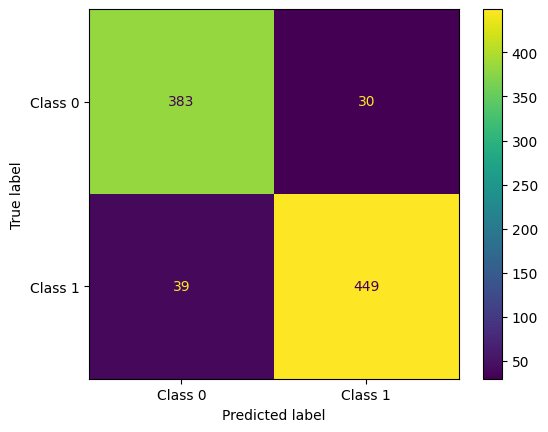

['xgboost_colorectal_polyp_classifier_augmented.pkl']

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# ===========================
# 0. تنظیم مسیر داده‌ها
# ===========================
data_dir = "/content/drive/MyDrive/data2/data2"  # مسیر داده‌ها
augmented_data_dir = "/content/augmented_data"  # مسیر داده‌های افزوده‌شده
img_size = (224, 224)
batch_size = 64

# ===========================
# 1. افزایش داده‌ها برای هر کلاس
# ===========================
data_generator = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=360,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest',
    brightness_range=[0.8, 1.2]  # اضافه کردن تغییر نور در بازه [0.8, 1.2]

)

def augment_data(original_data_dir, augmented_data_dir, target_count):
    if not os.path.exists(augmented_data_dir):
        os.makedirs(augmented_data_dir)

    for class_name in os.listdir(original_data_dir):
        class_dir = os.path.join(original_data_dir, class_name)
        augmented_class_dir = os.path.join(augmented_data_dir, class_name)
        if not os.path.exists(augmented_class_dir):
            os.makedirs(augmented_class_dir)

        image_files = [f for f in os.listdir(class_dir) if os.path.isfile(os.path.join(class_dir, f))]
        current_count = len(image_files)

        for i, img_file in enumerate(image_files):
            img_path = os.path.join(class_dir, img_file)
            img = tf.keras.utils.load_img(img_path, target_size=img_size)
            img_array = tf.keras.utils.img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0)

            gen = data_generator.flow(img_array, batch_size=1, save_to_dir=augmented_class_dir, save_prefix='aug', save_format='jpeg')

            for _ in range(min(target_count - current_count, 10)):
                next(gen)

            current_count = len(os.listdir(augmented_class_dir))
            if current_count >= target_count:
                break

# افزایش داده‌ها برای هر کلاس به 3000 تصویر
augment_data(data_dir, augmented_data_dir, target_count=4500)

# ===========================
# 2. آماده‌سازی داده‌ها
# ===========================
data_generator = ImageDataGenerator(
    rescale=1.0 / 255,
    validation_split=0.2  # 20% برای اعتبارسنجی
)

# تقسیم داده‌ها
train_generator = data_generator.flow_from_directory(
    augmented_data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training'  # بخش آموزشی
)

validation_generator = data_generator.flow_from_directory(
    augmented_data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'  # بخش اعتبارسنجی
)

test_generator = ImageDataGenerator(rescale=1.0 / 255).flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False  # بخش تست برای ارزیابی مدل
)

# ===========================
# 3. استخراج ویژگی‌ها با DenseNet121
# ===========================
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
feature_extractor = tf.keras.Model(
    inputs=base_model.input,
    outputs=tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
)

def extract_features(model, data_generator):
    features = []
    labels = []

    for images, label_batch in data_generator:
        feature_batch = model.predict(images)
        features.append(feature_batch)
        labels.append(label_batch)

        if len(labels) * data_generator.batch_size >= data_generator.samples:
            break

    features = np.vstack(features)
    labels = np.hstack(labels)
    return features, labels

# استخراج ویژگی‌ها
train_features, train_labels = extract_features(feature_extractor, train_generator)
val_features, val_labels = extract_features(feature_extractor, validation_generator)
test_features, test_labels = extract_features(feature_extractor, test_generator)

# ===========================
# 4. تنظیم داده‌ها با SMOTE
# ===========================
smote = SMOTE()
train_features_resampled, train_labels_resampled = smote.fit_resample(train_features, train_labels)

# ===========================
# 5. آموزش مدل XGBoost با تنظیم وزن کلاس‌ها و هایپرپارامترها
# ===========================
def train_xgboost(features, labels):
    pos_weight = len(labels) / (2 * np.sum(labels))  # وزن کلاس مثبت
    model = XGBClassifier(
        objective='binary:logistic',
        use_label_encoder=False,
        eval_metric='logloss',
        scale_pos_weight=pos_weight,  # تنظیم وزن کلاس‌ها
        learning_rate=0.03,
        max_depth=10,
        colsample_bytree=0.8,
        subsample=0.8,
        n_estimators=300
    )
    model.fit(features, labels)
    return model

xgb_model = train_xgboost(train_features_resampled, train_labels_resampled)

# ===========================
# 6. ارزیابی مدل
# ===========================
def evaluate_model(model, features, labels):
    y_pred = model.predict(features)
    y_prob = model.predict_proba(features)[:, 1]

    acc = accuracy_score(labels, y_pred)
    precision = precision_score(labels, y_pred, zero_division=0)
    recall = recall_score(labels, y_pred, zero_division=0)
    f1 = f1_score(labels, y_pred, zero_division=0)
    auc = roc_auc_score(labels, y_prob)
    cm = confusion_matrix(labels, y_pred)

    specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1]) if (cm[0, 0] + cm[0, 1]) > 0 else 0

    print(f"Accuracy: {acc:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Sensitivity (Recall): {recall:.2f}")
    print(f"Specificity: {specificity:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"AUC: {auc:.2f}")
    print("Confusion Matrix:")
    print(cm)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
    disp.plot()
    plt.show()

# ارزیابی روی مجموعه اعتبارسنجی و تست
print("Validation Set Results:")
evaluate_model(xgb_model, val_features, val_labels)

print("Test Set Results:")
evaluate_model(xgb_model, test_features, test_labels)

# ===========================
# 7. ذخیره مدل به صورت H5
# ===========================
import joblib
joblib.dump(xgb_model, "xgboost_colorectal_polyp_classifier_augmented.pkl")


In [ ]:
# ===========================
# 8. بارگذاری مدل و پیش‌بینی تصویر جدید
# ===========================
def predict_image(image_path, model, feature_extractor):
    # بارگذاری و پیش‌پردازش تصویر
    img = tf.keras.utils.load_img(image_path, target_size=img_size)
    img_array = tf.keras.utils.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0

    # استخراج ویژگی‌ها
    features = feature_extractor.predict(img_array)

    # پیش‌بینی کلاس
    prediction = model.predict(features)
    probability = model.predict_proba(features)[:, 1]

    return prediction[0], probability[0]

# مثال استفاده
loaded_model = joblib.load("xgboost_colorectal_polyp_classifier_augmented.pkl")
image_path = "/content/23001_3_Tubular_LGD_JNet_2A.jpg"  # مسیر تصویر
predicted_class, predicted_prob = predict_image(image_path, loaded_model, feature_extractor)
print(f"Predicted Class: {predicted_class}, Probability: {predicted_prob:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted Class: 0, Probability: 0.02
